In [14]:
# Part 1: Load and Explore Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
data = pd.read_csv("D:\project\student_score.csv")

In [16]:
# Overview of the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Information:\n")
data.info()

Dataset Shape: (30641, 15)

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  

In [17]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [18]:
# Display the first few rows
print("\nPreview of Data:\n", data.head())


Preview of Data:
    Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathSco

In [19]:
# Part 2: Data Preprocessing
# 2.1 Drop unnecessary columns (e.g., 'Unnamed: 0')
data = data.drop(columns=['Unnamed: 0'])

# 2.2 Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward-fill for simplicity

# 2.3 Encode categorical variables manually
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = data[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    data[col] = data[col].map(mapping)


C:\Users\MOHIT GUPTA\AppData\Local\Temp\ipykernel_9764\3801559770.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward-fill for simplicity


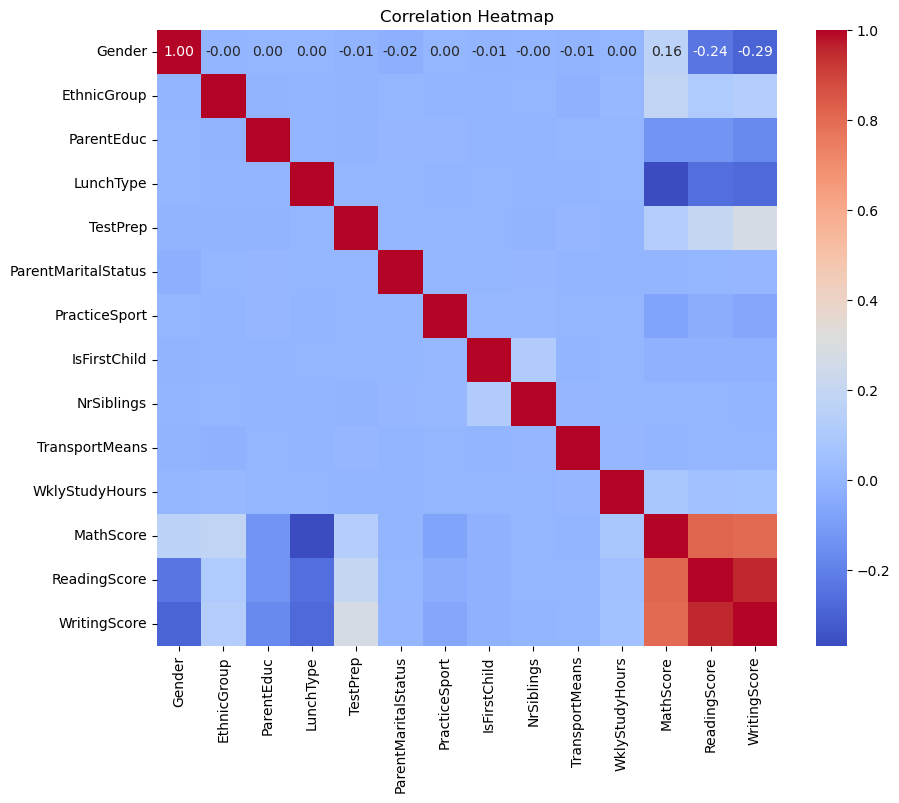

In [20]:
# Part 3: Visualization of Insights
# 3.1 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

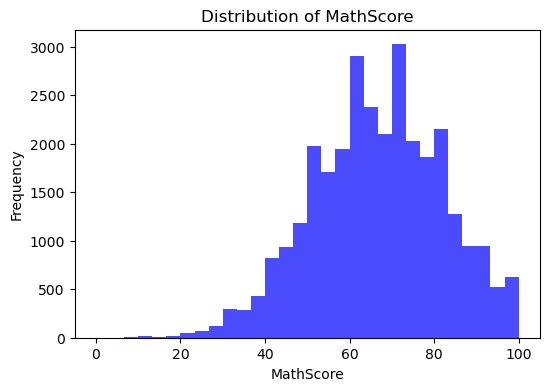

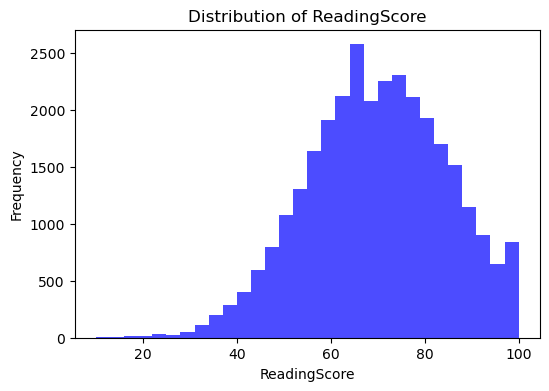

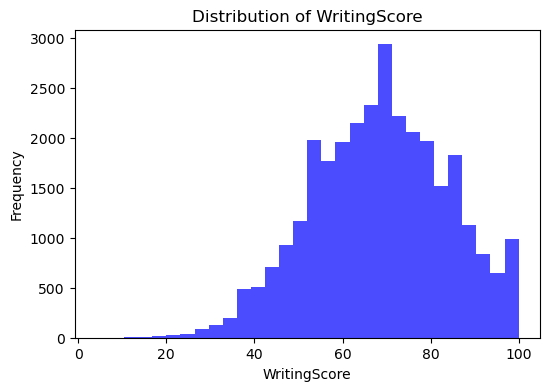

In [21]:
# 3.2 Histograms for Score Distributions
for score in ['MathScore', 'ReadingScore', 'WritingScore']:
    plt.figure(figsize=(6, 4))
    plt.hist(data[score], bins=30, color='blue', alpha=0.7)
    plt.title(f"Distribution of {score}")
    plt.xlabel(score)
    plt.ylabel("Frequency")
    plt.show()

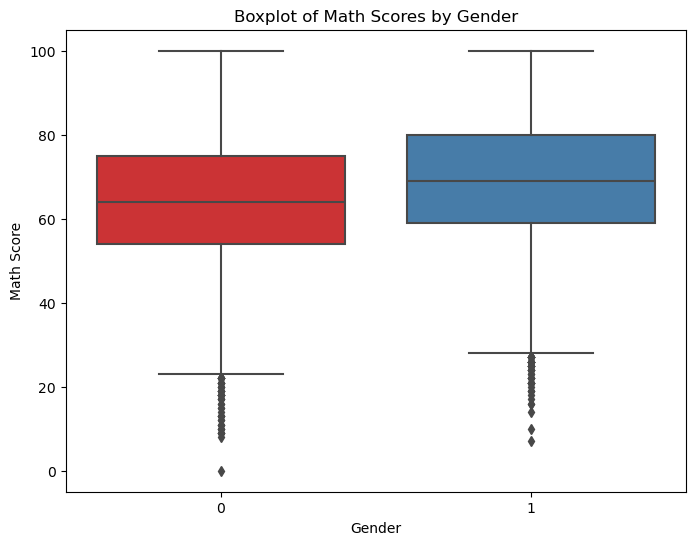

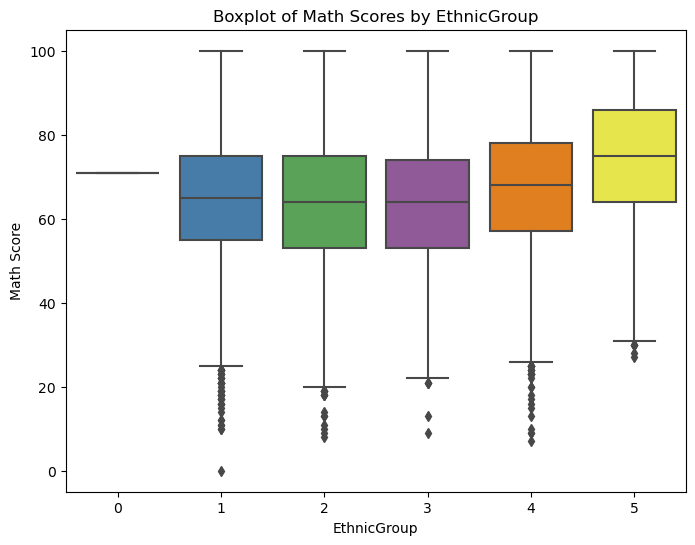

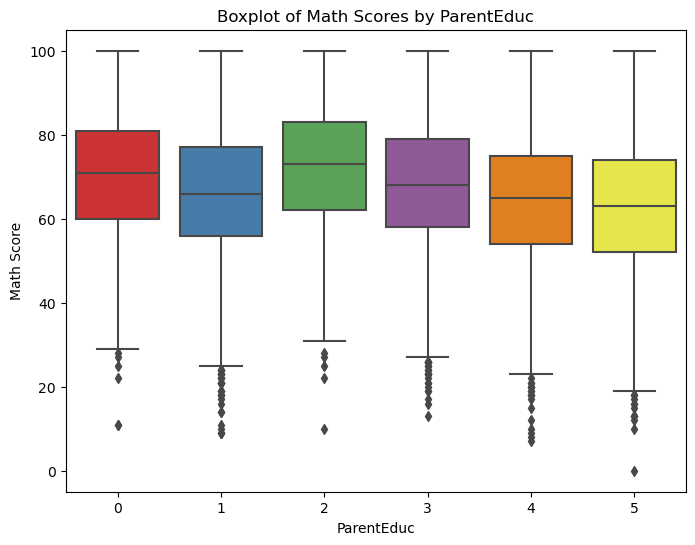

In [22]:
# 3.3 Boxplots to Analyze Relationships
categorical_features = ['Gender', 'EthnicGroup', 'ParentEduc']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature], y=data['MathScore'], palette="Set1")
    plt.title(f"Boxplot of Math Scores by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Math Score")
    plt.show()

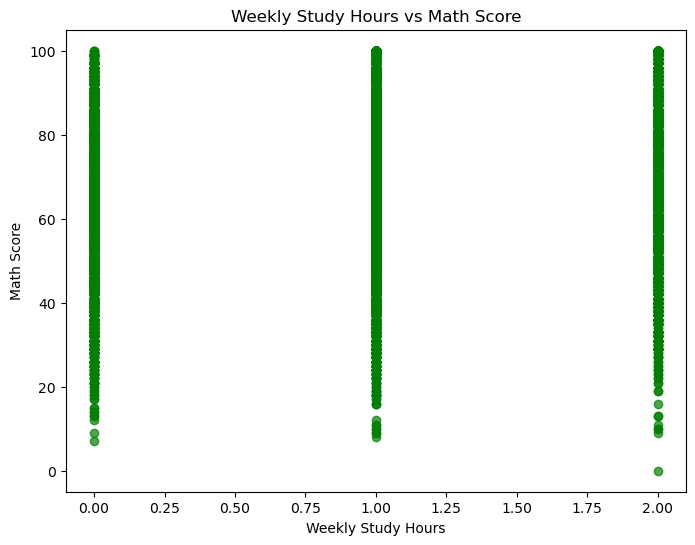

In [23]:
# 3.4 Scatter Plot: Weekly Study Hours vs Scores
plt.figure(figsize=(8, 6))
plt.scatter(data['WklyStudyHours'], data['MathScore'], alpha=0.7, color='green')
plt.title("Weekly Study Hours vs Math Score")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Math Score")
plt.show()

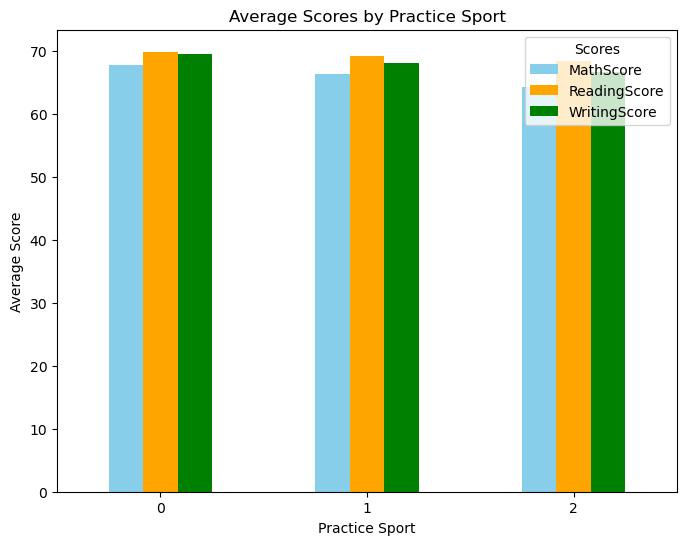

In [24]:
# 3.5 Bar Plot: Practice Sports vs Average Scores
practice_sports_avg = data.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
practice_sports_avg.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange', 'green'])
plt.title("Average Scores by Practice Sport")
plt.xlabel("Practice Sport")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Scores")
plt.show()

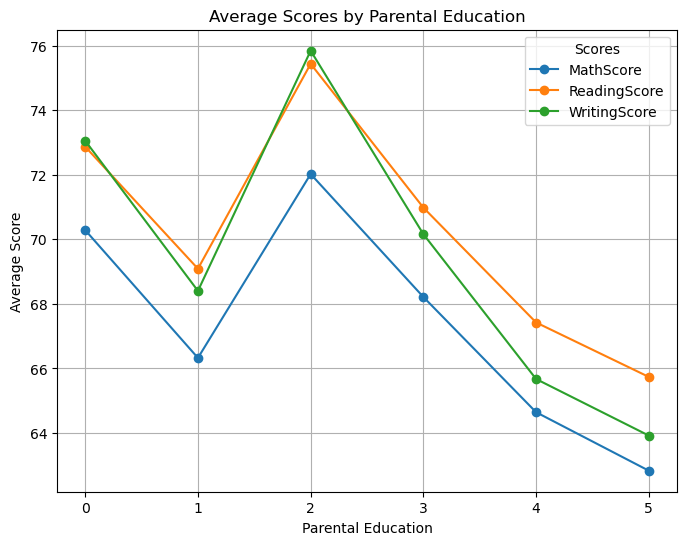

In [25]:
# Part 4: Analysis of Trends
# 4.1 Trend Analysis: Parent Education vs Scores
parent_education_avg = data.groupby('ParentEduc')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
parent_education_avg.plot(kind='line', figsize=(8, 6), marker='o')
plt.title("Average Scores by Parental Education")
plt.xlabel("Parental Education")
plt.ylabel("Average Score")
plt.grid()
plt.legend(title="Scores")
plt.show()


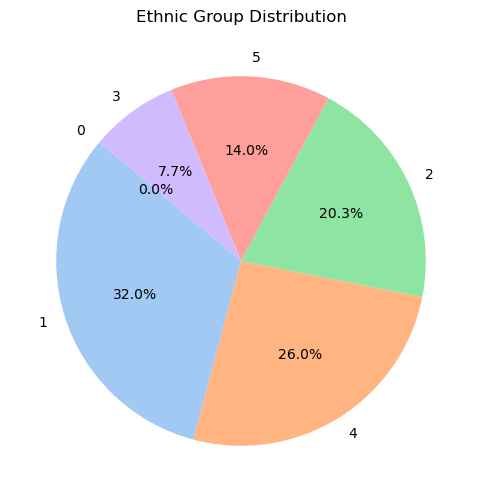


Visualization and analysis completed successfully!


In [26]:
# 4.2 Pie Chart: Distribution of Ethnic Groups
ethnic_group_counts = data['EthnicGroup'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ethnic_group_counts, labels=ethnic_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Ethnic Group Distribution")
plt.show()

print("\nVisualization and analysis completed successfully!")